# COVID-19 Exploratory Data Analysis

#### Import required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

print('Libraries imported! :)')

Libraries imported! :)


#### Import data

In [5]:
data = pd.read_csv('covid_19_data.csv', sep = ',')
data.head(-3)

SNo ObservationDate      Province/State  Country/Region  \
0            1      01/22/2020               Anhui  Mainland China   
1            2      01/22/2020             Beijing  Mainland China   
2            3      01/22/2020           Chongqing  Mainland China   
3            4      01/22/2020              Fujian  Mainland China   
4            5      01/22/2020               Gansu  Mainland China   
...        ...             ...                 ...             ...   
156284  156285      11/15/2020    Zabaykalsky Krai          Russia   
156285  156286      11/15/2020           Zacatecas          Mexico   
156286  156287      11/15/2020  Zakarpattia Oblast         Ukraine   
156287  156288      11/15/2020   Zaporizhia Oblast         Ukraine   
156288  156289      11/15/2020             Zeeland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
1           1/22/2020 17:00       14.0     0.0        0.0  
2           1/22/2020 17:00        6.0     0.0        0.0  
3           1/22/2020 17:00        1.0     0.0        0.0  
4           1/22/2020 17:00        0.0     0.0        0.0  
...                     ...        ...     ...        ...  
156284  2020-11-16 05:25:57    15222.0   219.0    12262.0  
156285  2020-11-16 05:25:57    13501.0  1120.0        0.0  
156286  2020-11-16 05:25:57    19384.0   468.0     8382.0  
156287  2020-11-16 05:25:57    18484.0   164.0     3021.0  
156288  2020-11-16 05:25:57     5041.0    86.0        0.0  

[156289 rows x 8 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156292 entries, 0 to 156291
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              156292 non-null  int64  
 1   ObservationDate  156292 non-null  object 
 2   Province/State   111979 non-null  object 
 3   Country/Region   156292 non-null  object 
 4   Last Update      156292 non-null  object 
 5   Confirmed        156292 non-null  float64
 6   Deaths           156292 non-null  float64
 7   Recovered        156292 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 9.5+ MB


* Check for nan values and fill them with 'Unknown'

In [7]:
data.isna().sum()

SNo                    0
ObservationDate        0
Province/State     44313
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [8]:
data["Province/State"]= data["Province/State"].fillna('Unknown')
data.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [9]:
data['Country/Region'].value_counts()

US                     15430
Russia                 14066
Mainland China          9267
Japan                   8504
India                   5967
                       ...  
Republic of Ireland        1
 Azerbaijan                1
St. Martin                 1
North Ireland              1
Channel Islands            1
Name: Country/Region, Length: 226, dtype: int64

In [10]:
# Change as China rather than Mainland China
data['Country/Region'] = data['Country/Region'].replace('Mainland China', 'China')

In [11]:
data['Active_cases'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

SNo ObservationDate Province/State Country/Region      Last Update  \
0    1      01/22/2020          Anhui          China  1/22/2020 17:00   
1    2      01/22/2020        Beijing          China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing          China  1/22/2020 17:00   
3    4      01/22/2020         Fujian          China  1/22/2020 17:00   
4    5      01/22/2020          Gansu          China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  Active_cases  
0        1.0     0.0        0.0           1.0  
1       14.0     0.0        0.0          14.0  
2        6.0     0.0        0.0           6.0  
3        1.0     0.0        0.0           1.0  
4        0.0     0.0        0.0           0.0

In [12]:
# We've gotten the latest stats
df = data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index()
df.head()

index     SNo ObservationDate Province/State Country/Region  \
0  155534  155535      11/15/2020        Unknown    Afghanistan   
1  155535  155536      11/15/2020        Unknown        Albania   
2  155536  155537      11/15/2020        Unknown        Algeria   
3  155537  155538      11/15/2020        Unknown        Andorra   
4  155538  155539      11/15/2020        Unknown         Angola   

           Last Update  Confirmed  Deaths  Recovered  Active_cases  
0  2020-11-16 05:25:57    43240.0  1617.0    35092.0        6531.0  
1  2020-11-16 05:25:57    27830.0   623.0    12889.0       14318.0  
2  2020-11-16 05:25:57    67679.0  2154.0    44633.0       20892.0  
3  2020-11-16 05:25:57     5872.0    76.0     4747.0        1049.0  
4  2020-11-16 05:25:57    13451.0   322.0     6444.0        6685.0

In [13]:
df_world = df.groupby(["ObservationDate"])[["Confirmed","Active_cases","Recovered","Deaths"]].sum().reset_index()
df_world.head()

ObservationDate   Confirmed  Active_cases   Recovered     Deaths
0      11/15/2020  54370186.0    18097899.0  34955148.0  1317139.0

In [14]:
countries = df['Country/Region'].values

ctr_arr = np.array(countries) 
np.unique(ctr_arr)

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guin

## EDA

### Implemention of some methods
* So now we don't have to write over and over again when plotting.
* You can plot any country by using get_country & plot_all method.
* If they are being plotted as unknown, then there is no info provided for states.

In [15]:
columns = ['Confirmed', 'Active_cases', 'Recovered', 'Deaths']

def split_date(data):
    data["datetime"] = pd.to_datetime(data["ObservationDate"])
    data["month"] = data["datetime"].dt.month
    return data

def get_country(data,country):
    data = data[(data['Country/Region'] == country) ].reset_index(drop=True)
    split_date(data)
    return data

def get_actual_values(data):
    data = data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index()
    data.drop(['SNo', 'Last Update'], axis = 1, inplace = True)
    return data

def line_plot_day_by_day(data):
    data_by_time = data.groupby(["ObservationDate","Country/Region"])["Confirmed","Deaths","Recovered","Active_cases"].sum().reset_index(drop=True)
    plt.figure(figsize = (14,9))
    ax = sns.lineplot(x = data_by_time.index  , y = 'Confirmed' ,label = 'Confirmed', data = data_by_time)
    sns.lineplot(x = data_by_time.index  , y = 'Active_cases' ,label = 'Active_Cases', data = data_by_time)
    sns.lineplot(x = data_by_time.index  , y = 'Deaths' ,label = 'Deaths', data = data_by_time)
    sns.lineplot(x = data_by_time.index  , y = 'Recovered' ,label = 'Recovered', data = data_by_time)
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    plt.title('Plotted day-by-day')
    plt.legend()

def line_plot_month(data):
    split_date(data)
    plt.figure(figsize = (14,9))
    ax = sns.lineplot(x = data.month  , y = 'Confirmed' ,label = 'Confirmed', data = data)
    sns.lineplot(x = data.month  , y = 'Active_cases' ,label = 'Active_Cases', data = data)
    sns.lineplot(x = data.month  , y = 'Deaths' ,label = 'Deaths', data = data)
    sns.lineplot(x = data.month  , y = 'Recovered' ,label = 'Recovered', data = data)
    plt.title('Plotted month-by-month')
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    plt.legend()
    plt.show()

def scatter_evolution(data):
    data = data.groupby(["ObservationDate","Country/Region"])["Confirmed","Deaths","Recovered","Active_cases"].sum().reset_index().reset_index(drop=True)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['ObservationDate'], y=data['Confirmed'],
                        mode='lines',
                        name='Confirmed cases'))

    fig.add_trace(go.Scatter(x=data['ObservationDate'], y=data['Active_cases'],
                        mode='lines',
                        name='Active cases',line=dict( dash='dot')))
    fig.add_trace(go.Scatter(x=data['ObservationDate'], y=data['Deaths'],name='Deaths',
                                       marker_color='black',mode='lines',line=dict( dash='dot') ))
    fig.add_trace(go.Scatter(x=data['ObservationDate'], y=data['Recovered'],
                        mode='lines',
                        name='Recovered cases',marker_color='green'))
    fig.update_layout(
        title='Evolution of cases by time',
            template='plotly_white'
    )
    fig.show()

    
def bar_plot_province(data):
    data = data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index()
    data = data.groupby(["Province/State"])["Confirmed","Active_cases","Recovered","Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)
    for each in columns:
        plt.figure(figsize = (14,9))
        ax = sns.barplot(x = each, y = 'Province/State', data = data)
        ax.xaxis.set_major_formatter(ticker.EngFormatter())
        plt.title(str(each) + ' cases by time in each Province')

def province_cases_pie(data):
    data = data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index()
    data_state = data.groupby(["Province/State"])["Confirmed","Active_cases","Recovered","Deaths"].sum().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)
    fig = px.pie(data_state, values=data_state['Confirmed'], names=data_state['Province/State'],
                 title='Confirmed cases in provinces in ' + str(data['Country/Region'][0]),
                hole=.2)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()
    fig = px.pie(data_state, values=data_state['Active_cases'], names=data_state['Province/State'],
                 title='Active cases in provinces in ' + str(data['Country/Region'][0]),
                hole=.2)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()
    fig = px.pie(data_state, values=data_state['Recovered'], names=data_state['Province/State'],
                 title='Recovered cases in provinces in ' + str(data['Country/Region'][0]),
                hole=.2)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()
    fig = px.pie(data_state, values=data_state['Deaths'], names=data_state['Province/State'],
                 title='Death cases in ' + str(data['Country/Region'][0]),
                hole=.2)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()
    
        
def total_cases_pie(data):
    data = data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index()
    data = data.groupby(["Country/Region"])["Confirmed","Deaths","Recovered","Active_cases"].sum().reset_index()
    labels = ["Active cases","Recovered","Deaths"]
    values = data.loc[0, ["Active_cases","Recovered","Deaths"]]
    fig = px.pie(data, values=values, names=labels, color_discrete_sequence=['green','royalblue','darkblue'], hole=0.5)
    fig.update_layout(
        title='Total cases in ' + str(data['Country/Region'][0]) + ' ' + str(data["Confirmed"][0]),
    )
    fig.show()
    
def plot_all(data):
    total_cases_pie(data)
    province_cases_pie(data)
    bar_plot_province(data)
    scatter_evolution(data)
    line_plot_day_by_day(data)
    line_plot_month(data)

In [16]:
data_germany = get_country(data, 'Germany')
data_italy = get_country(data, 'Italy')
data_china = get_country(data, 'China')

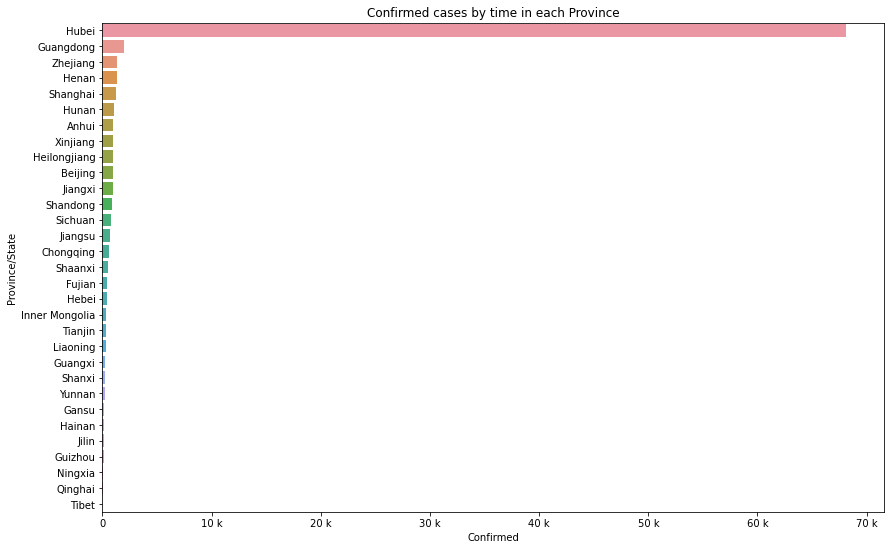

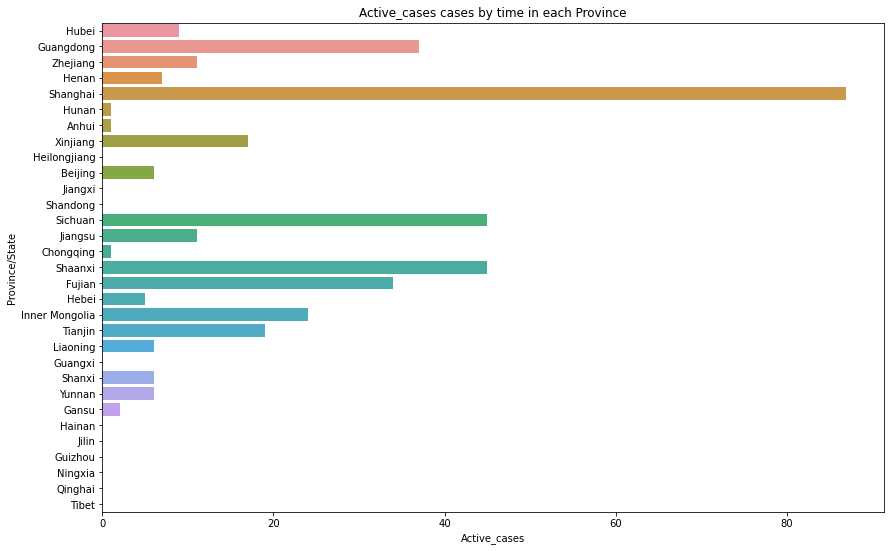

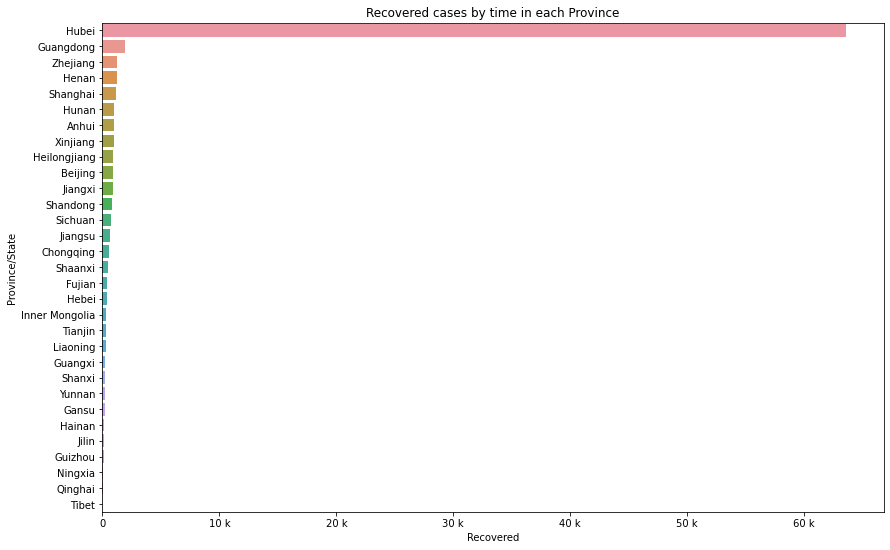

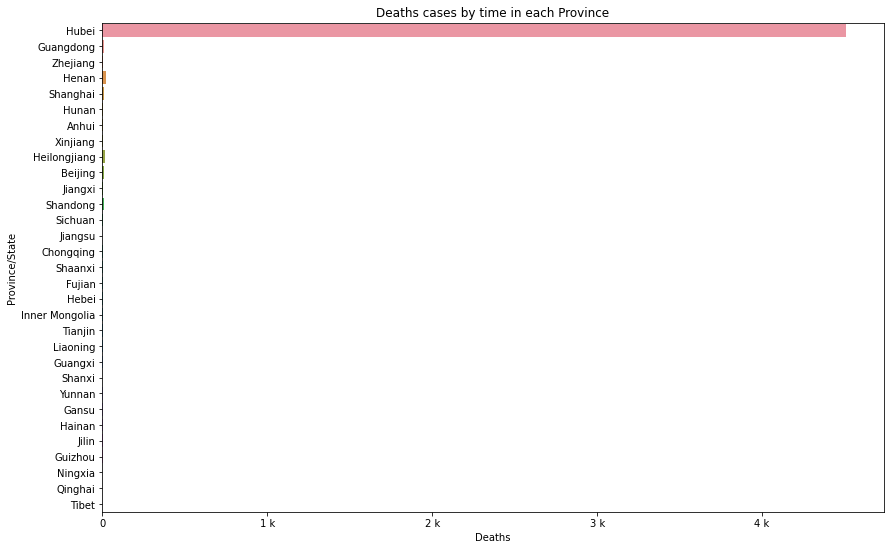

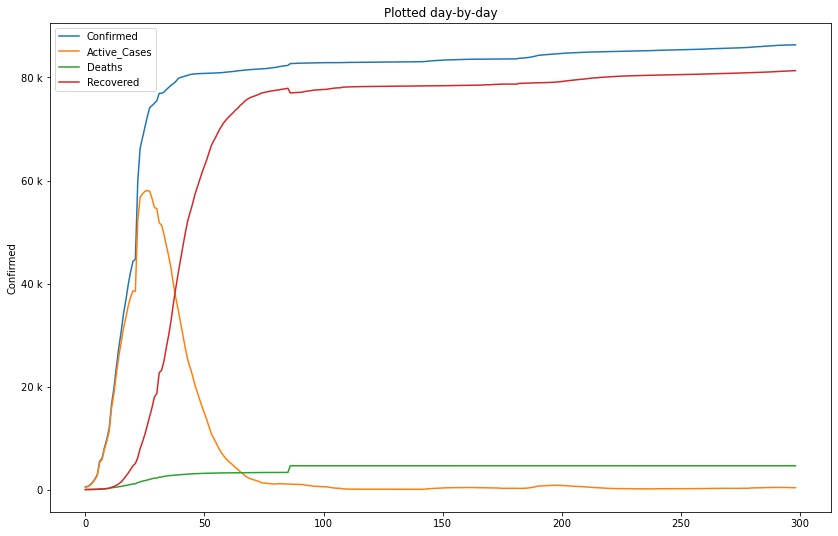

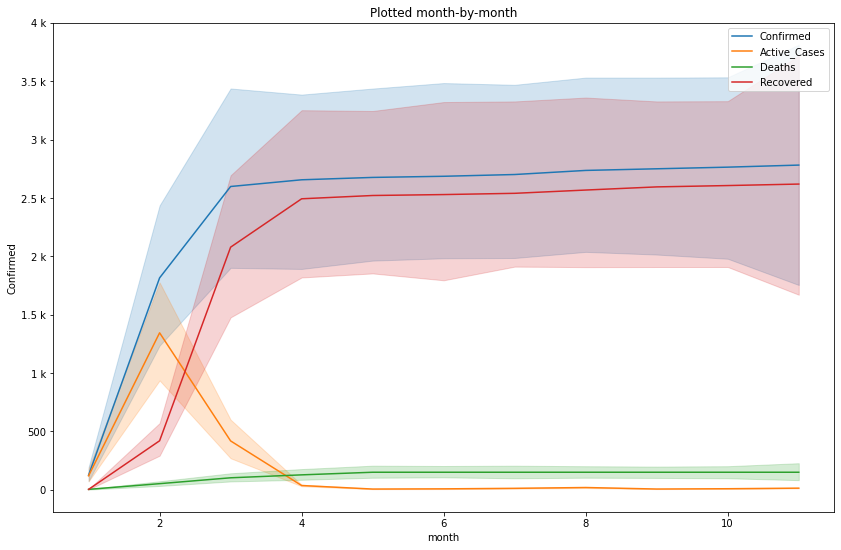

In [17]:
plot_all(data_china)

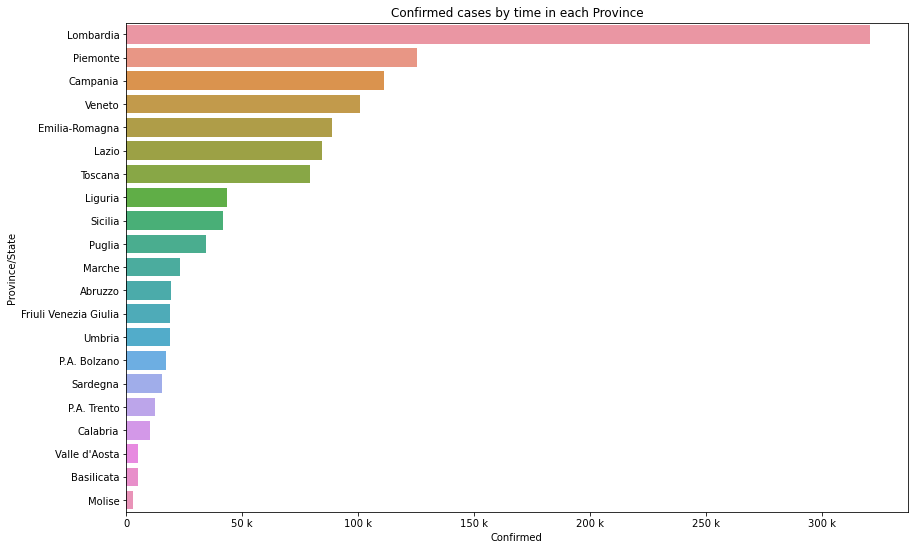

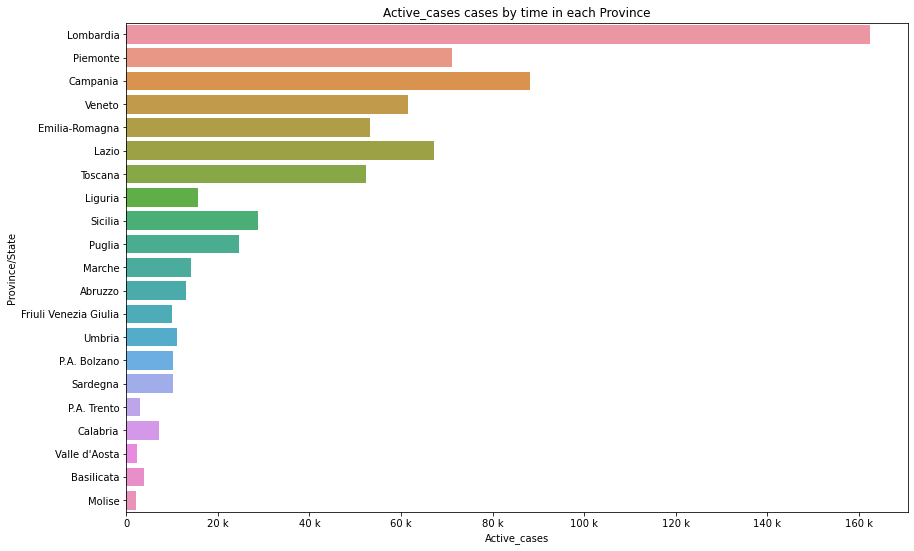

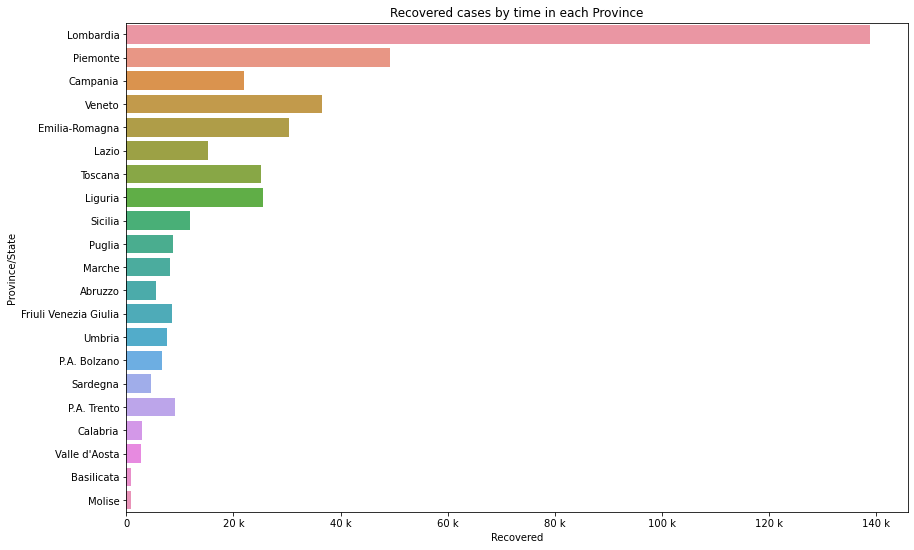

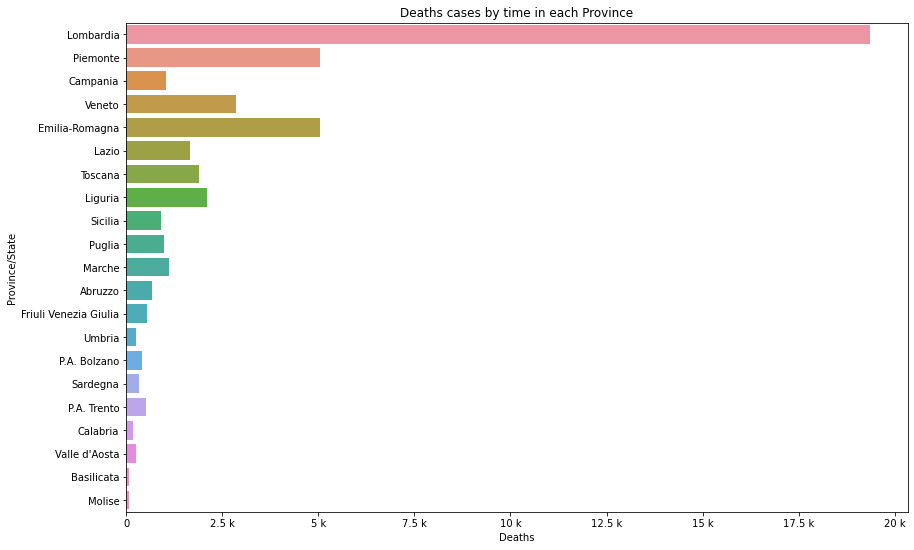

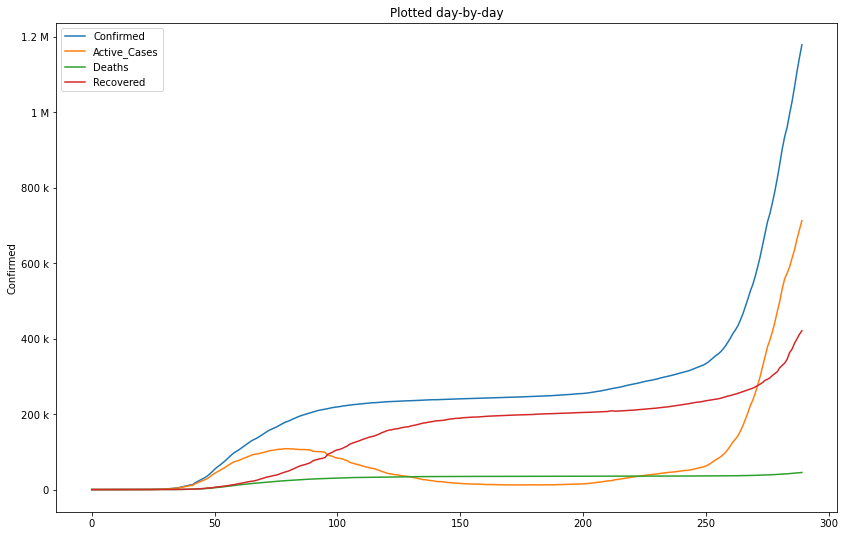

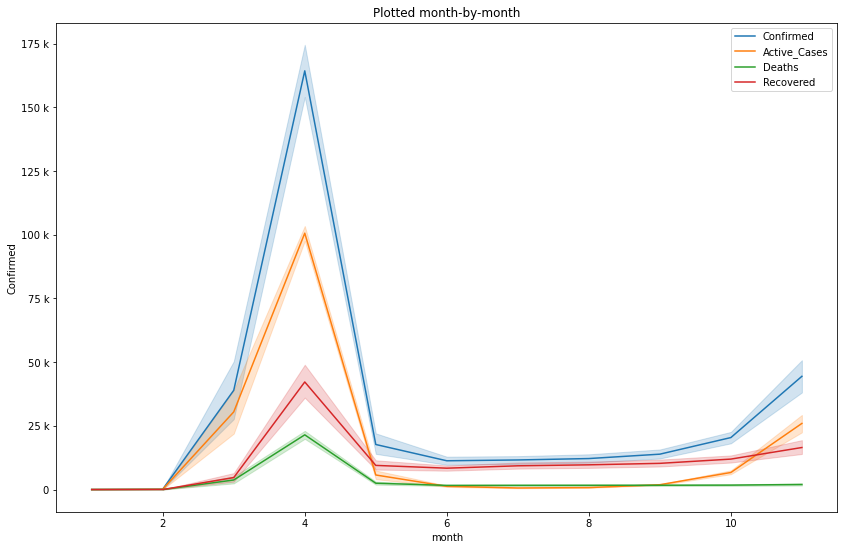

In [18]:
plot_all(data_italy)

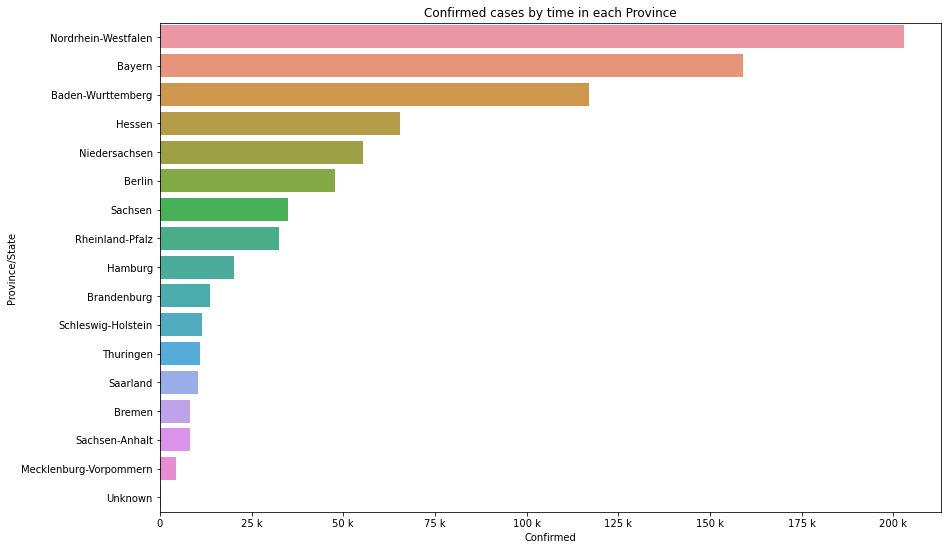

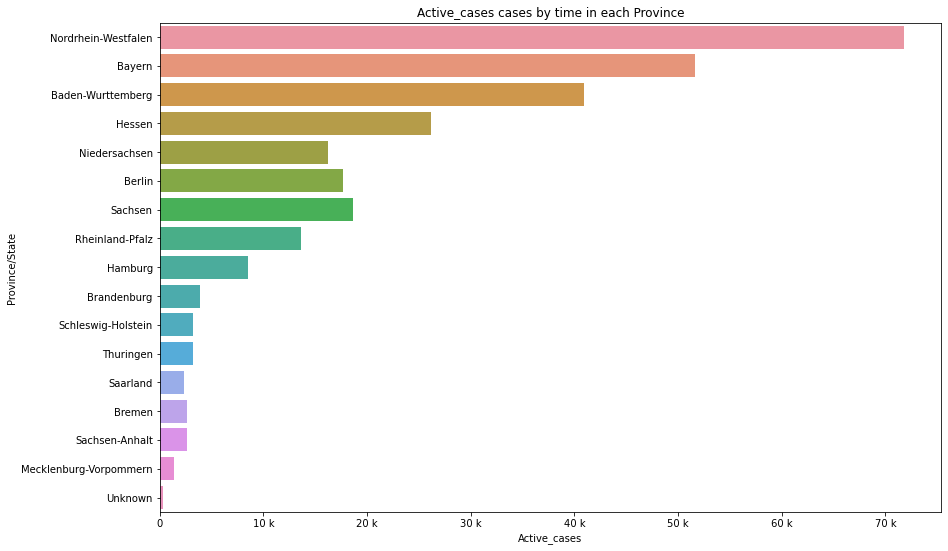

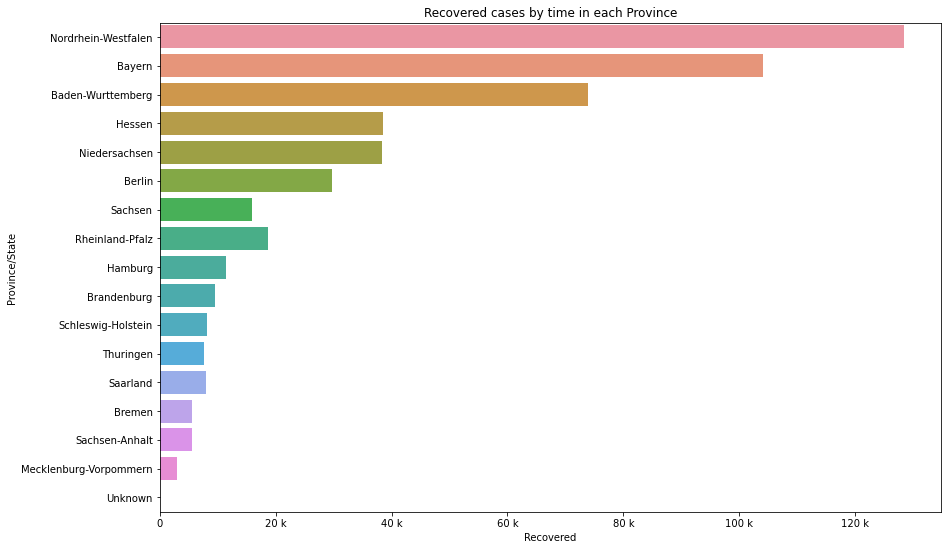

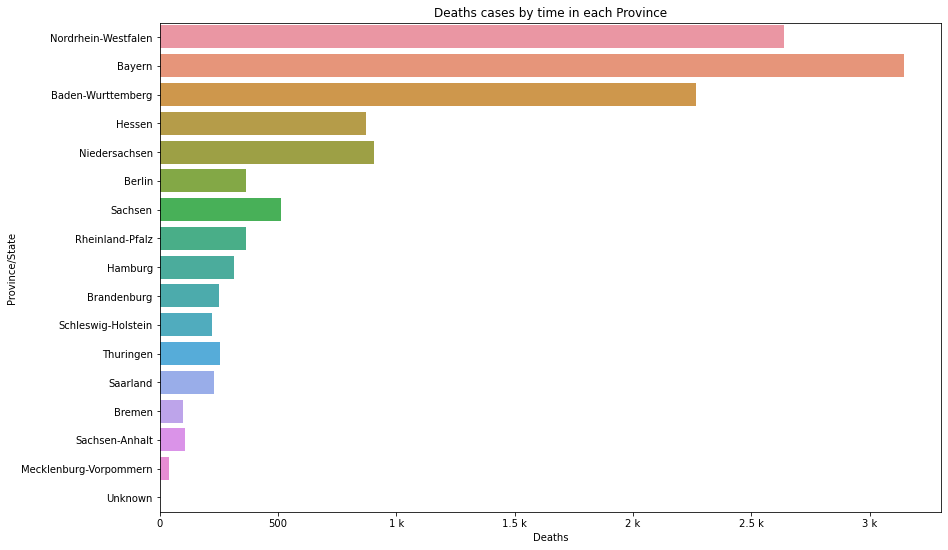

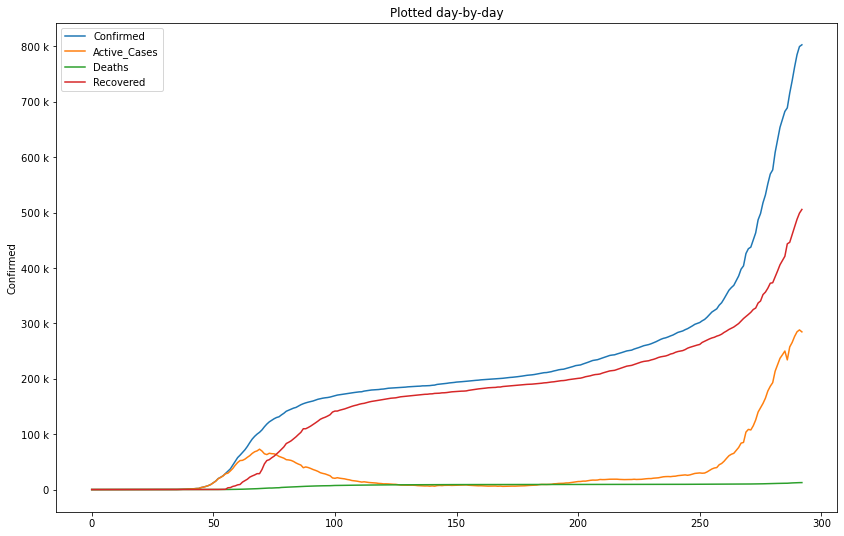

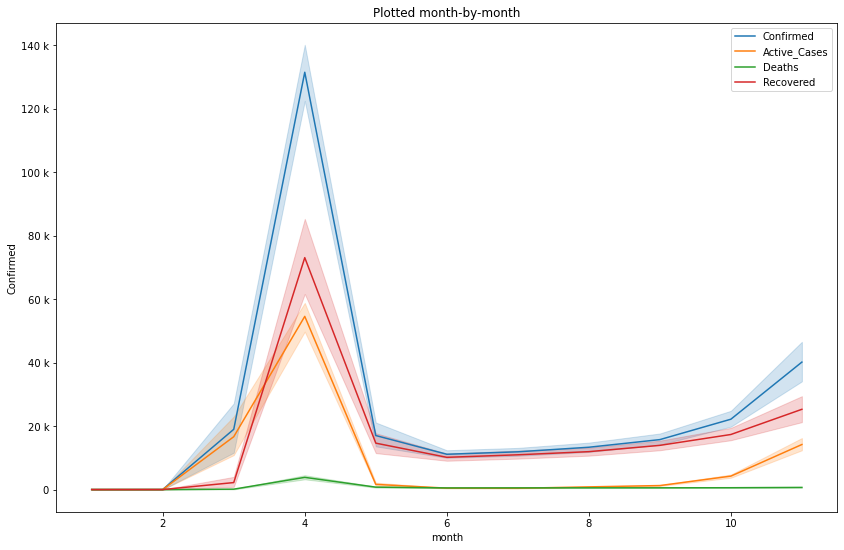

In [19]:
plot_all(data_germany)